<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Aula07_2_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    #URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    #dados = pd.read_csv(URL_, header = None)
    dados = pd.read_csv("iris2.csv", sep=",", header = 0)
    print(dados)
    #Seleciona-se apenas os 100 primeiros pontos, os quais correspodem as classes
    #Setosa e Versicolor (as classes linearmente separaveis)
    dadosls = dados[:100] # Se pegar a outra classe não consegue trabalhar (Não pegou a virginica)

    dadosls.iloc[:,4] = np.where(dadosls.iloc[:, -1]=='Iris-setosa', 0, 1) # 0 -> setosa e 1 -> virginica
    dadosls = np.asmatrix(dadosls, dtype = 'float64')
    return dadosls

In [3]:
class Perceptron(object):

    def __init__(self, num_entradas, epocas=20, taxa_aprendizagem=0.1):
        self.epocas = epocas # nº epocas é o numero de vezes que irá passar pelos dados
        self.taxa_aprendizagem = taxa_aprendizagem
        self.pesos = np.zeros(num_entradas + 1) # Mais 01 do bias

    def calc_saida(self, entradas):
        net = np.dot(entradas, self.pesos[1:]) + self.pesos[0] # peos[0]-> bayes
        if net > 0:
            saida = 1
        else:
            saida = 0
        return saida

    def treinar(self, entradas_treino, alvos):
        n_epoca = 0
        for _ in range(self.epocas):
            n_epoca = n_epoca + 1
            erro = 0
            for entradas, alvo in zip(entradas_treino, alvos):
                estimacao = self.calc_saida(entradas)
                erro = alvo - estimacao
                print("Erro:", erro, ", na epoca:", n_epoca)
                # Atuasliza os pesos transformando os dados no formato matriz para array
                self.pesos[1:] += np.squeeze(np.asarray(self.taxa_aprendizagem * erro * entradas))
                self.pesos[0] += self.taxa_aprendizagem * erro

Código Principal

In [12]:
#CODIGO PRINCIPAL

basedados = load_data()

#Composicao dos dados
'''
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa: 50 primeiros elementos
-- Iris Versicolour: 50 elementos intermediários
-- Iris Virginica: 50 elementos finais
'''


     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


<ipython-input-2-8423181336f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosls.iloc[:,4] = np.where(dadosls.iloc[:, -1]=='Iris-setosa', 0, 1) # 0 -> setosa e 1 -> virginica
<ipython-input-2-8423181336f3>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dadosls.iloc[:,4] = np.where(dadosls.iloc[:, -1]=='Iris-setosa', 0, 1) # 0 -> setosa e 1 -> virginica


'\n1. sepal length in cm\n2. sepal width in cm\n3. petal length in cm\n4. petal width in cm\n5. class:\n-- Iris Setosa: 50 primeiros elementos\n-- Iris Versicolour: 50 elementos intermediários\n-- Iris Virginica: 50 elementos finais\n'

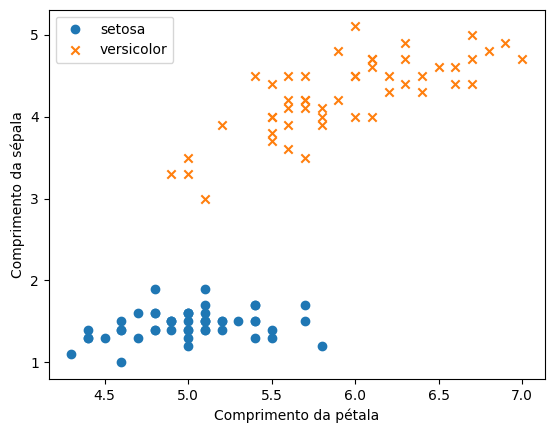

In [13]:
plt.scatter(np.array(basedados[:50,0]), np.array(basedados[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(basedados[50:,0]), np.array(basedados[50:,2]), marker='x', label='versicolor')
plt.xlabel('Comprimento da pétala')
plt.ylabel('Comprimento da sépala')
plt.legend()
plt.show()

In [14]:
#entradas para treinamento
entradas_treino = basedados[:, :-1] # todos os dados exceto o label

In [15]:
#saida para treinamento
alvos = basedados[:, -1] #seleciona apenas última coluna - o label

In [16]:
perceptron = Perceptron(4) #informamos apenas o número de entradas (quatro), os
#demais parâmetros ficarão com valores padrão
perceptron.treinar(entradas_treino, alvos)

Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
Erro: [[0.]] , na epoca: 1
E

In [17]:
#setosa
entrada_teste = np.array([5.1, 3.5, 1.4, 0.2])
saida_teste1 = perceptron.calc_saida(entrada_teste)
print(saida_teste1)

0


In [18]:
#Versicolour
entrada_teste = np.array([7, 3.2, 4.5, 1.4])
saida_teste2 = perceptron.calc_saida(entrada_teste)
print(saida_teste2)

1


In [19]:
#Virginica
entrada_teste = np.array([6.3, 3.3, 6, 2.5])
saida_teste3 = perceptron.calc_saida(entrada_teste)
print(saida_teste3)

1
